In [1]:
import ROOT
import random
import array
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/04


In [2]:
binedge = [0,8,16,24,28,32,36,40,43,46,54,80,200]
n = len(binedge)-1    # Number of pt ranges.
N = 500               # Number of bins in probe inv. mass histograms.

In [3]:
chain = ROOT.TChain('Events')
chain.Add('SkimTree_1.root')
chain.Add('SkimTree_2.root')
chain.Add('SkimTree_3.root')
chain.Add('SkimTree_4.root')
chain.Add('SkimTree_5.root')
chain.Add('SkimTree_6.root')
chain.Add('SkimTree_7.root')
chain.Add('SkimTree_8.root')
chain.Add('SkimTree_9.root')
chain.Add('SkimTree_10.root')
chain.Add('SkimTree_11.root')
chain.Add('SkimTree_12.root')
chain.Add('SkimTree_13.root')
chain.Add('SkimTree_14.root')
chain.Add('SkimTree_15.root')
chain.Add('SkimTree_16.root')
chain.Add('SkimTree_17.root')
chain.Add('SkimTree_18.root')
chain.Add('SkimTree_19.root')

evcutflow = ROOT.TH1F('evcuts', 'Events Cut', 3, -0.5, 2.5)
mucutflow = ROOT.TH1F('mucuts', 'Muon Cut', 5, -0.5, 4.5)
mu1pt = ROOT.TH1F('pt_muon_1', 'Probe_pt', 200, 0, 200)
mu2pt = ROOT.TH1F('pt_muon_2', 'Probe_pt_2', 200, 0, 200)
inv_mas = ROOT.TH1F('inv', 'Invariant Mass', 1000, 40, 140)

In [4]:
tagpt_inv = ROOT.TH2D('inv. mass vs. tag pt','inv. mass vs. tagpt',200,60,120,200,0,200)
probept_inv = ROOT.TH2D('inv. mass vs. probe pt','inv. mass vs. probept',200,60,120,200,0,200)
tagpt_probept = ROOT.TH2D('probe_pt vs. tag_pt','probe_pt vs. tag_pt',200,0,200,200,0,200)
delr_inv = ROOT.TH2D('inv. mass vs. del. R','inv. mass vs. delta R',400,0,140,200,0,6)
delr_c_inv = ROOT.TH2D('inv. mass vs. del_r_cut','inv. mass vs. delta_r_cut',400,0,140,200,0,6)
delta_r = ROOT.TH1D('DeltaR','DeltaR',1000,0,6)

In [5]:
probeiv1 = ROOT.TH1F('inv1', 'Inv. mass for 1st pt range', N, 40, 140)
probeiv1c = ROOT.TH1F('inv1c', 'Inv. mass for 1st pt range after cut', N, 40, 140)
probeiv2 = ROOT.TH1F('inv2', 'Inv. mass for 2nd pt range', N, 40, 140)
probeiv2c = ROOT.TH1F('inv2c', 'Inv. mass for 2nd pt range after cut', N, 40, 140)
probeiv3 = ROOT.TH1F('inv3', 'Inv. mass for 3rd pt range', N, 40, 140)
probeiv3c = ROOT.TH1F('inv3c', 'Inv. mass for 3rd pt range after cut', N, 40, 140)
probeiv4 = ROOT.TH1F('inv4', 'Inv. mass for 4th pt range', N, 40, 140)
probeiv4c = ROOT.TH1F('inv4c', 'Inv. mass for 4th pt range after cut', N, 40, 140)
probeiv5 = ROOT.TH1F('inv5', 'Inv. mass for 5th pt range', N, 40, 140)
probeiv5c = ROOT.TH1F('inv5c', 'Inv. mass for 5th pt range after cut', N, 40, 140)
probeiv6 = ROOT.TH1F('inv6', 'Inv. mass for 6th pt range', N, 40, 140)
probeiv6c = ROOT.TH1F('inv6c', 'Inv. mass for 6th pt range after cut', N, 40, 140)
probeiv7 = ROOT.TH1F('inv7', 'Inv. mass for 7th pt range', N, 40, 140)
probeiv7c = ROOT.TH1F('inv7c', 'Inv. mass for 7th pt range after cut', N, 40, 140)
probeiv8 = ROOT.TH1F('inv8', 'Inv. mass for 8th pt range', N, 40, 140)
probeiv8c = ROOT.TH1F('inv8c', 'Inv. mass for 8th pt range after cut', N, 40, 140)
probeiv9 = ROOT.TH1F('inv9', 'Inv. mass for 9th pt range', N, 40, 140)
probeiv9c = ROOT.TH1F('inv9c', 'Inv. mass for 9th pt range after cut', N, 40, 140)
probeiv10 = ROOT.TH1F('inv10', 'Inv. mass for 10th pt range', N, 40, 140)
probeiv10c = ROOT.TH1F('inv10c', 'Inv. mass for 10th pt range after cut', N, 40, 140)
probeiv11 = ROOT.TH1F('inv11', 'Inv. mass for 11th pt range', N, 40, 140)
probeiv11c = ROOT.TH1F('inv11c', 'Inv. mass for 11th pt range after cut', N, 40, 140)
probeiv12 = ROOT.TH1F('inv12', 'Inv. mass for 12th pt range', N, 40, 140)
probeiv12c = ROOT.TH1F('inv12c', 'Inv. mass for 12th pt range after cut', N, 40, 140)

In [ ]:
for i, entry in enumerate(chain):
    if i%200000 == 0: print('Events iterated over: ',i)
        
    mu_pts_per_event    = list(entry.Muon_pt)
    mu_etas_per_event   = list(entry.Muon_eta)
    mu_phis_per_event   = list(entry.Muon_phi)
    mu_mass_per_event   = list(entry.Muon_mass)
    mu_charge_per_event = list(entry.Muon_charge)
    mu_dxy_per_event    = list(entry.Muon_dxy)
    mu_dz_per_event     = list(entry.Muon_dz)
    mu_ip3d_per_event   = list(entry.Muon_ip3d)
    mu_iso_per_event    = list(entry.Muon_pfRelIso04_all)
    mu_tid_per_event    = list(entry.Muon_tightId)
    
    evcutflow.Fill(0) 
    
    if len(mu_pts_per_event) < 2:     # We pass only those events which have atleast 2 muons.
        continue
    
    evcutflow.Fill(1)
    
    mu_clean_idxs = []                # Clean indics.
    
    for i in range(len(mu_pts_per_event)):
        mucutflow.Fill(0)
        if mu_pts_per_event[i] < 20:
            continue
        mucutflow.Fill(1)
        if abs(mu_etas_per_event[i]) > 2.4:
            continue
        mucutflow.Fill(2)
        if mu_iso_per_event[i] > 0.3:
            continue
        mucutflow.Fill(3)
        if mu_tid_per_event[i] < 0.9:
            continue
        mucutflow.Fill(4)
        mu_clean_idxs.append(i)
        
    if len(mu_clean_idxs) < 1:        # We pass only those events which has atleast one tag muon.
        continue
    
    evcutflow.Fill(2)
    
    random.shuffle(mu_clean_idxs)     # Shuffle the tag indices.
    
    tag_idxs = mu_clean_idxs[0]       # Saved the index of the tag muon of the event.
    
    tp4 = ROOT.TLorentzVector()                   # 4 momentum of the tag muon.
    tp4.SetPtEtaPhiM(mu_pts_per_event[tag_idxs], 
                    mu_etas_per_event[tag_idxs], 
                    mu_phis_per_event[tag_idxs], 
                    mu_mass_per_event[tag_idxs])
    
    pr_idxs =[]                       # Probe indices.
    for i in range(len(mu_pts_per_event)):
        if i != tag_idxs:
            pr_idxs.append(i) 
            
    random.shuffle(pr_idxs)           # Shuffle the probe indices.
    
    for j in pr_idxs: 
        if (mu_charge_per_event[tag_idxs] * mu_charge_per_event[j]) < 0:           # Opposite Charge criteria.
                
            pp4 = ROOT.TLorentzVector()            # 4 momentum of the probe muon.
            pp4.SetPtEtaPhiM(mu_pts_per_event[j], 
                            mu_etas_per_event[j], 
                            mu_phis_per_event[j], 
                            mu_mass_per_event[j])
            
            invm = (pp4+tp4).M()                  # Invariant mass.

            delta_r.Fill(pp4.DeltaR(tp4))         # Delta R
            delr_inv.Fill(invm,pp4.DeltaR(tp4))   # Delta R vs inv. mass.
            
            if pp4.DeltaR(tp4) < 0.4:             # Cut on Delta R.
                continue
                
            delr_c_inv.Fill(invm,pp4.DeltaR(tp4)) # Delta R vs inv. mass after cut.
                
            if 60 < invm < 120:                   

                tagpt_inv.Fill(invm,mu_pts_per_event[tag_idxs])                     # tag pt vs inv. mass
                probept_inv.Fill(invm,mu_pts_per_event[j])                          # probe pt vs inv. mass
                tagpt_probept.Fill(mu_pts_per_event[tag_idxs],mu_pts_per_event[j])  # tag pt vs probe pt
            
                inv_mas.Fill(invm)
                mu1pt.Fill(mu_pts_per_event[j])
                    
                if 0 < mu_pts_per_event[j] < 8:
                    probeiv1.Fill(invm)
                if 8 < mu_pts_per_event[j] < 16:
                    probeiv2.Fill(invm)
                if 16 < mu_pts_per_event[j] < 24:
                    probeiv3.Fill(invm)
                if 24 < mu_pts_per_event[j] < 28:
                    probeiv4.Fill(invm)
                if 28 < mu_pts_per_event[j] < 32:
                    probeiv5.Fill(invm)
                if 32 < mu_pts_per_event[j] < 36:
                    probeiv6.Fill(invm)
                if 36 < mu_pts_per_event[j] < 40:
                    probeiv7.Fill(invm)
                if 40 < mu_pts_per_event[j] < 43:
                    probeiv8.Fill(invm)
                if 43 < mu_pts_per_event[j] < 46:
                    probeiv9.Fill(invm) 
                if 46 < mu_pts_per_event[j] < 54:
                    probeiv10.Fill(invm)  
                if 54 < mu_pts_per_event[j] < 80:                                
                    probeiv11.Fill(invm) 
                if 80 < mu_pts_per_event[j] < 200:
                    probeiv12.Fill(invm)   
                    
                if mu_tid_per_event[j] > 0.9 and mu_iso_per_event[j] < 0.3:
                    mu2pt.Fill(mu_pts_per_event[j])
                        
                    if 0 < mu_pts_per_event[j] < 8:
                        probeiv1c.Fill(invm)
                    if 8 < mu_pts_per_event[j] < 16:
                        probeiv2c.Fill(invm)
                    if 16 < mu_pts_per_event[j] < 24:
                        probeiv3c.Fill(invm)
                    if 24 < mu_pts_per_event[j] < 28:
                        probeiv4c.Fill(invm)
                    if 28 < mu_pts_per_event[j] < 32:
                        probeiv5c.Fill(invm)
                    if 32 < mu_pts_per_event[j] < 36:
                        probeiv6c.Fill(invm)
                    if 36 < mu_pts_per_event[j] < 40:
                        probeiv7c.Fill(invm)
                    if 40 < mu_pts_per_event[j] < 43:
                        probeiv8c.Fill(invm)
                    if 43 < mu_pts_per_event[j] < 46:
                        probeiv9c.Fill(invm) 
                    if 46 < mu_pts_per_event[j] < 54:
                        probeiv10c.Fill(invm)  
                    if 54 < mu_pts_per_event[j] < 80:                                
                        probeiv11c.Fill(invm) 
                    if 80 < mu_pts_per_event[j] < 200:
                        probeiv12c.Fill(invm)   
                break

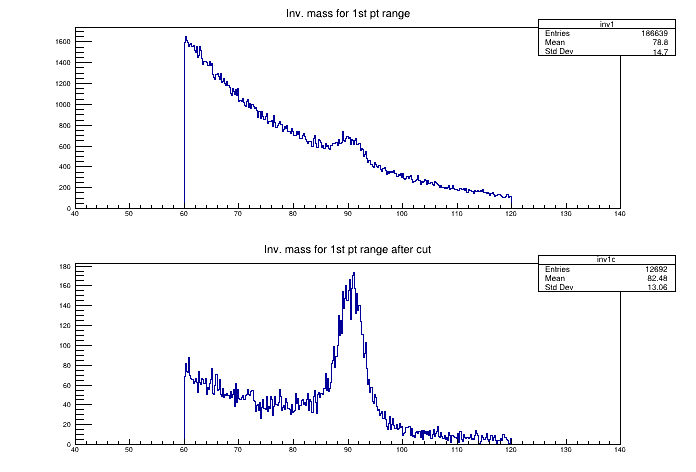

In [7]:
eff=[]           # We created a blank array to store efficiency values.
cc1 = ROOT.TCanvas()
cc1.Divide(1,2)
cc1.cd(1)
probeiv1.Draw()
cc1.cd(2)
probeiv1c.Draw()
cc1.Draw()
eff.append(probeiv1c.Integral()/probeiv1.Integral())

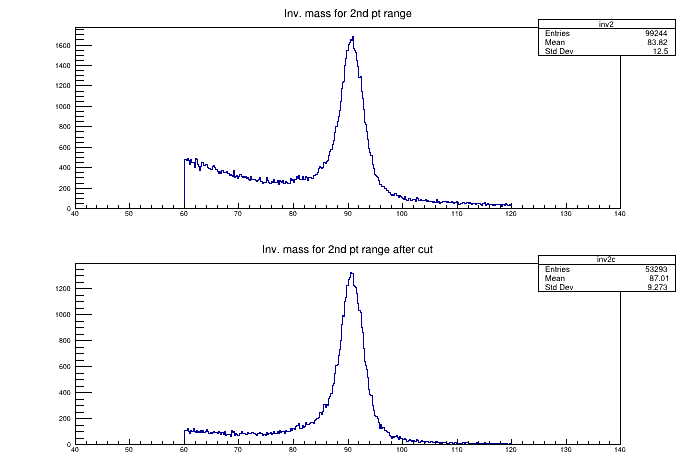

In [8]:
cc2 = ROOT.TCanvas()
cc2.Divide(1,2)
cc2.cd(1)
probeiv2.Draw()
cc2.cd(2)
probeiv2c.Draw()
cc2.Draw()
eff.append(probeiv2c.Integral()/probeiv2.Integral())

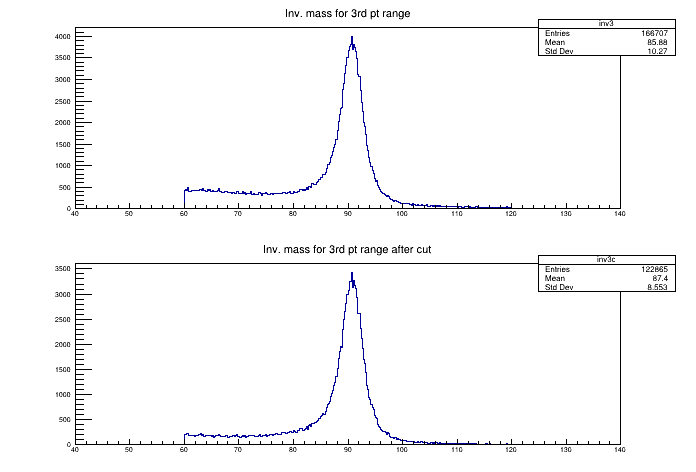

In [9]:
cc3 = ROOT.TCanvas()
cc3.Divide(1,2)
cc3.cd(1)
probeiv3.Draw()
cc3.cd(2)
probeiv3c.Draw()
cc3.Draw()
eff.append(probeiv3c.Integral()/probeiv3.Integral())

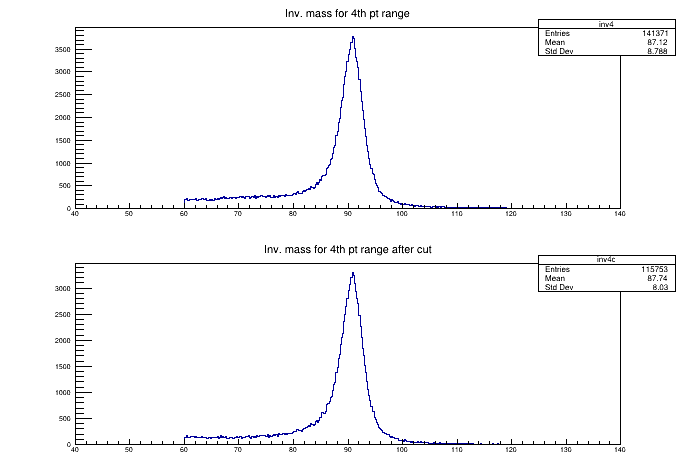

In [10]:
cc4 = ROOT.TCanvas()
cc4.Divide(1,2)
cc4.cd(1)
probeiv4.Draw()
cc4.cd(2)
probeiv4c.Draw()
cc4.Draw()
eff.append(probeiv4c.Integral()/probeiv4.Integral())

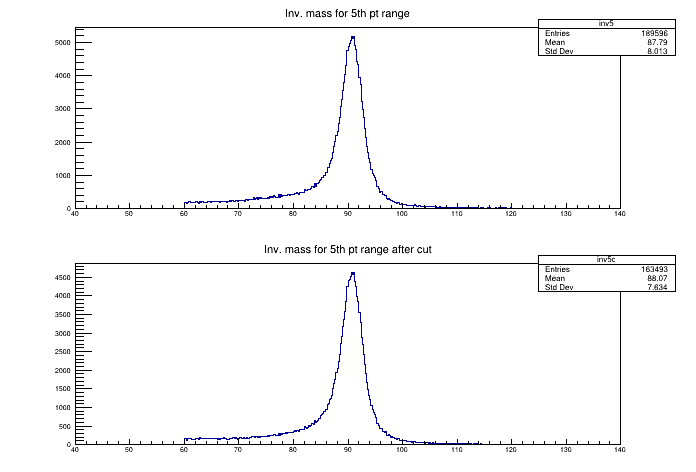

In [11]:
cc5 = ROOT.TCanvas()
cc5.Divide(1,2)
cc5.cd(1)
probeiv5.Draw()
cc5.cd(2)
probeiv5c.Draw()
cc5.Draw()
eff.append(probeiv5c.Integral()/probeiv5.Integral())

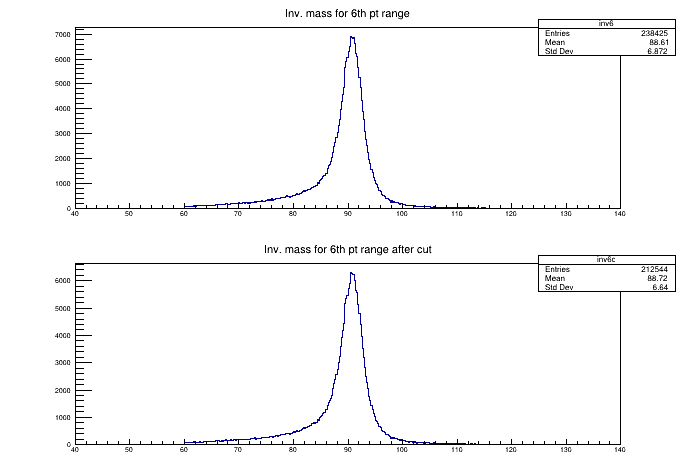

In [12]:
cc6 = ROOT.TCanvas()
cc6.Divide(1,2)
cc6.cd(1)
probeiv6.Draw()
cc6.cd(2)
probeiv6c.Draw()
cc6.Draw()
eff.append(probeiv6c.Integral()/probeiv6.Integral())

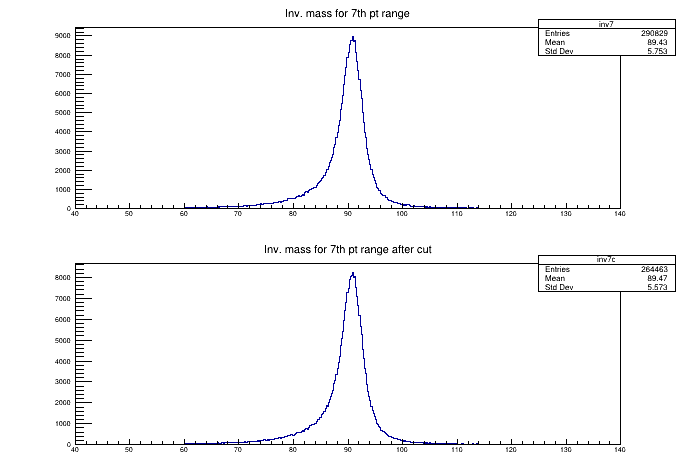

In [13]:
cc7 = ROOT.TCanvas()
cc7.Divide(1,2)
cc7.cd(1)
probeiv7.Draw()
cc7.cd(2)
probeiv7c.Draw()
cc7.Draw()
eff.append(probeiv7c.Integral()/probeiv7.Integral())

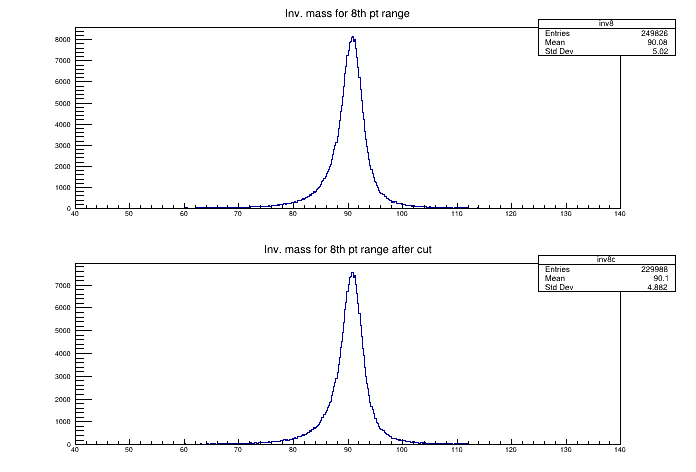

In [14]:
cc8 = ROOT.TCanvas()
cc8.Divide(1,2)
cc8.cd(1)
probeiv8.Draw()
cc8.cd(2)
probeiv8c.Draw()
cc8.Draw()
eff.append(probeiv8c.Integral()/probeiv8.Integral())

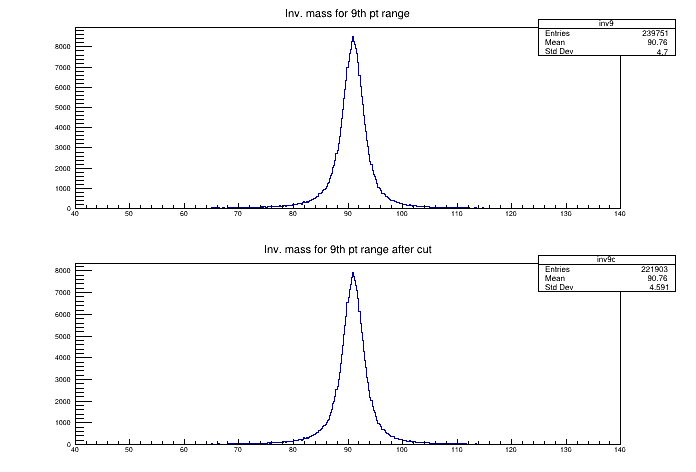

In [15]:
cc9 = ROOT.TCanvas()
cc9.Divide(1,2)
cc9.cd(1)
probeiv9.Draw()
cc9.cd(2)
probeiv9c.Draw()
cc9.Draw()
eff.append(probeiv9c.Integral()/probeiv9.Integral())

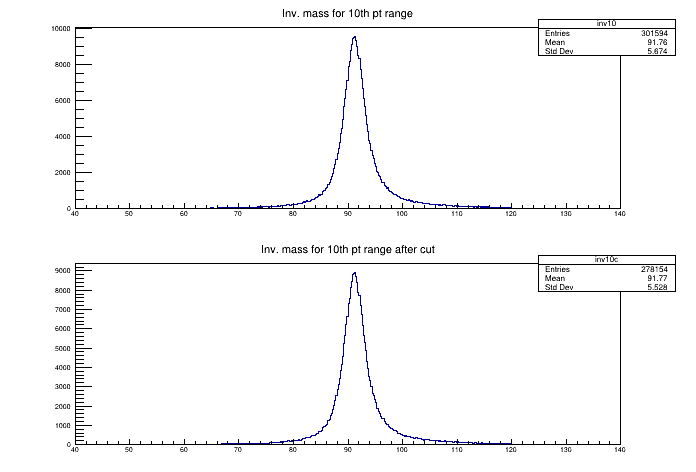

In [16]:
cc10 = ROOT.TCanvas()
cc10.Divide(1,2)
cc10.cd(1)
probeiv10.Draw()
cc10.cd(2)
probeiv10c.Draw()
cc10.Draw()
eff.append(probeiv10c.Integral()/probeiv10.Integral())

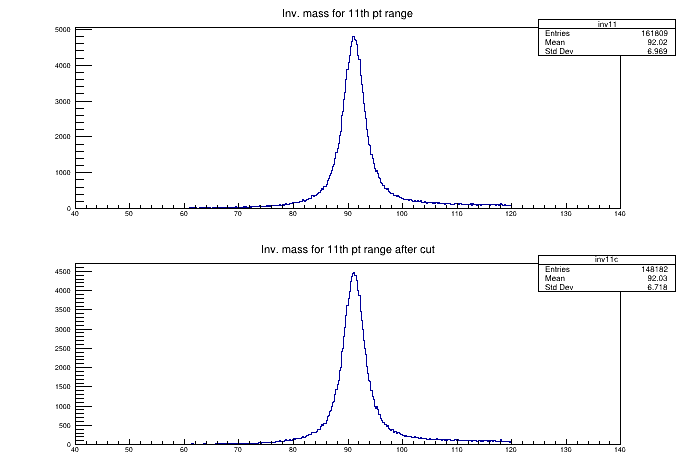

In [17]:
cc11 = ROOT.TCanvas()
cc11.Divide(1,2)
cc11.cd(1)
probeiv11.Draw()
cc11.cd(2)
probeiv11c.Draw()
cc11.Draw()
eff.append(probeiv11c.Integral()/probeiv11.Integral())

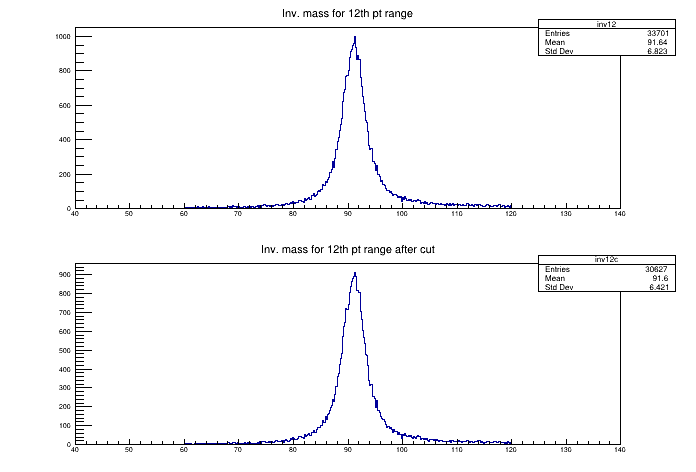

In [18]:
cc12 = ROOT.TCanvas()
cc12.Divide(1,2)
cc12.cd(1)
probeiv12.Draw()
cc12.cd(2)
probeiv12c.Draw()
cc12.Draw()
eff.append(probeiv12c.Integral()/probeiv12.Integral())

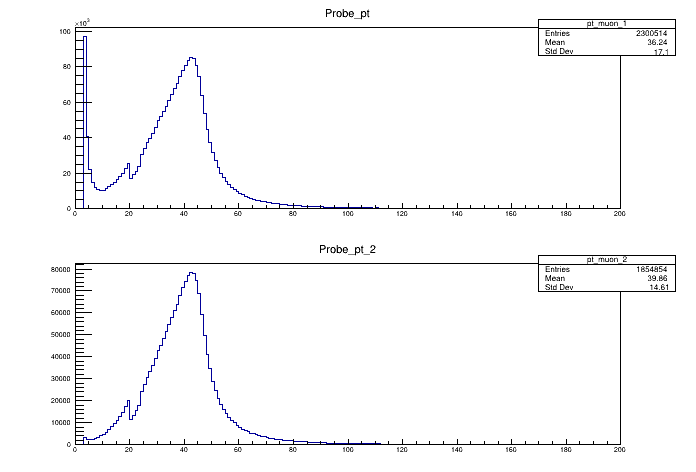

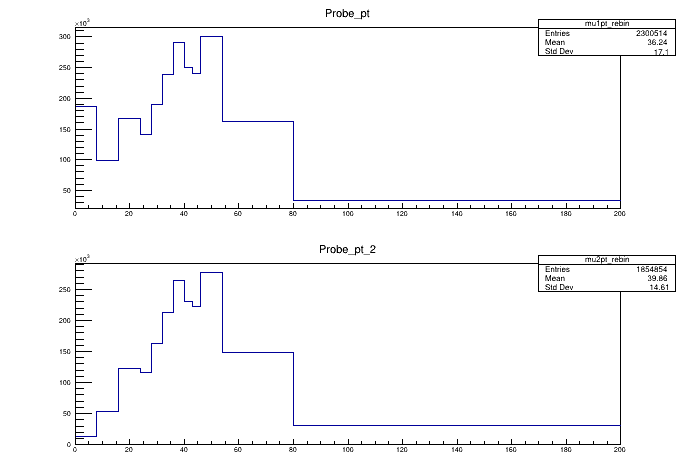

In [19]:
t1 = ROOT.TCanvas()
t1.Divide(1,2)
t1.cd(1)
mu1pt.Draw()
t1.cd(2)
mu2pt.Draw()
t1.Draw()

mu1pt_rebin = mu1pt.Rebin(n, "mu1pt_rebin", array.array('d', binedge))
mu2pt_rebin = mu2pt.Rebin(n, "mu2pt_rebin", array.array('d', binedge))

t2 = ROOT.TCanvas()
t2.Divide(1,2)
t2.cd(1)
mu1pt_rebin.Draw()
t2.cd(2)
mu2pt_rebin.Draw()
t2.Draw()

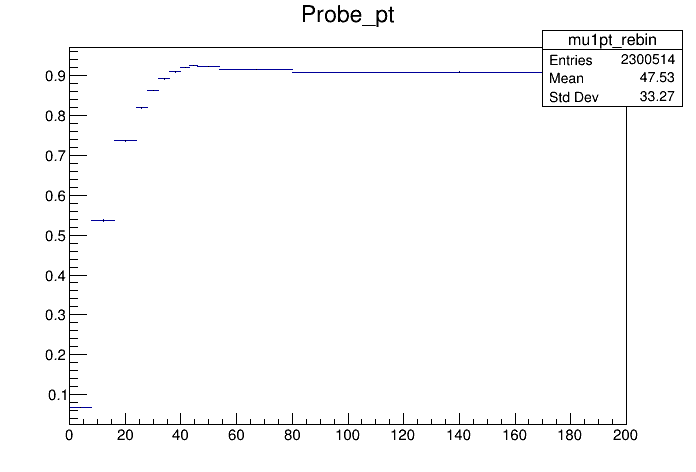

In [20]:
h = mu1pt_rebin.Clone()
h.Divide(mu2pt_rebin,mu1pt_rebin,1,1,"B")
t3 = ROOT.TCanvas()
h.Draw()
t3.Draw()

In [21]:
f1=ROOT.TFile("hist02.root","RECREATE")

probeiv1.Write()
probeiv2.Write()
probeiv3.Write()
probeiv4.Write()
probeiv5.Write()
probeiv6.Write()
probeiv7.Write()
probeiv8.Write()
probeiv9.Write()
probeiv10.Write()
probeiv11.Write()
probeiv12.Write()

probeiv1c.Write()
probeiv2c.Write()
probeiv3c.Write()
probeiv4c.Write()
probeiv5c.Write()
probeiv6c.Write()
probeiv7c.Write()
probeiv8c.Write()
probeiv9c.Write()
probeiv10c.Write()
probeiv11c.Write()
probeiv12c.Write()

tagpt_inv.Write()
probept_inv.Write()
tagpt_probept.Write()
delr_inv.Write()
delr_c_inv.Write()

f1.Close()

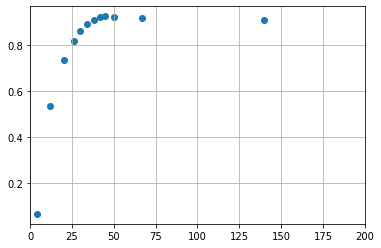

In [22]:
x,y=[],[]
for i in range(len(binedge)-1):
    y.append(eff[i])
    x.append((binedge[i]+binedge[i+1])/2)
plt.scatter(x,y)
plt.xlim(0,200)
plt.grid()
plt.show()

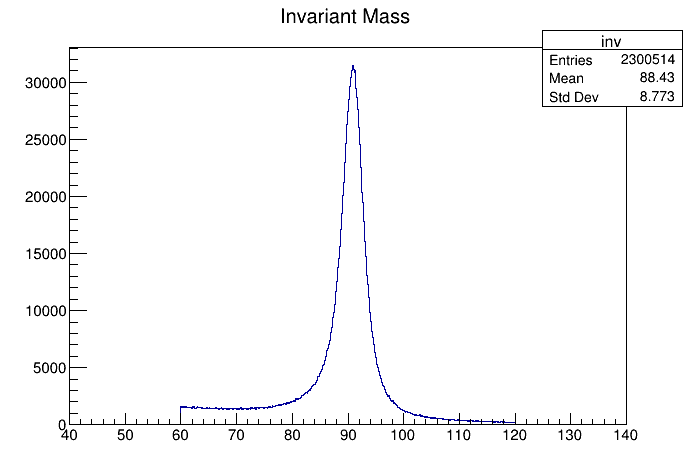

In [23]:
c = ROOT.TCanvas()
inv_mas.Draw()
c.Draw()

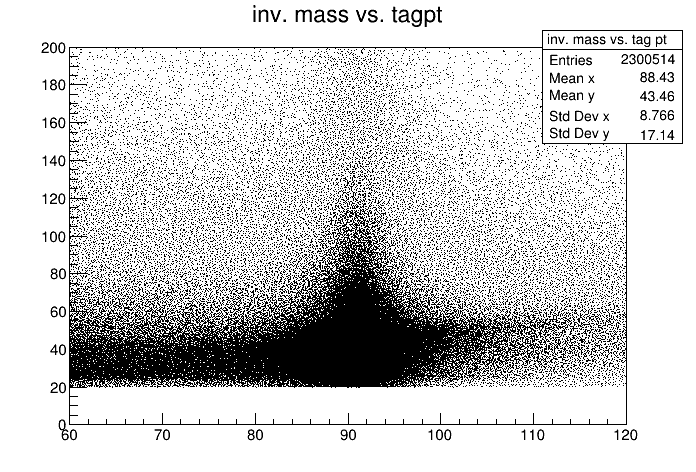

In [24]:
c1 = ROOT.TCanvas()
tagpt_inv.Draw()
c1.Draw()

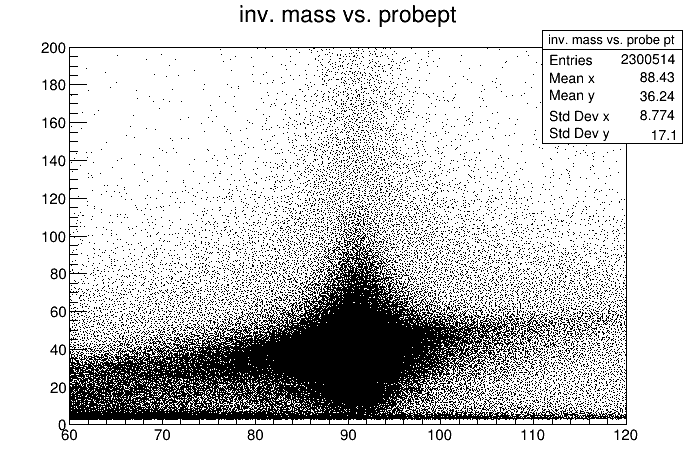

In [25]:
c2 = ROOT.TCanvas()
probept_inv.Draw()
c2.Draw()

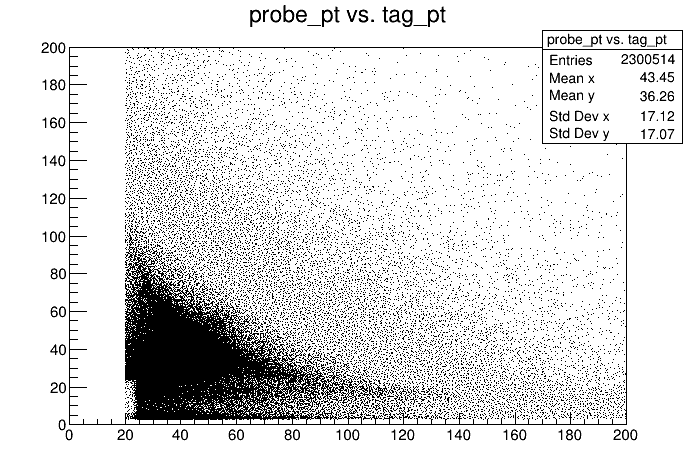

In [26]:
c3 = ROOT.TCanvas()
tagpt_probept.Draw()
c3.Draw()

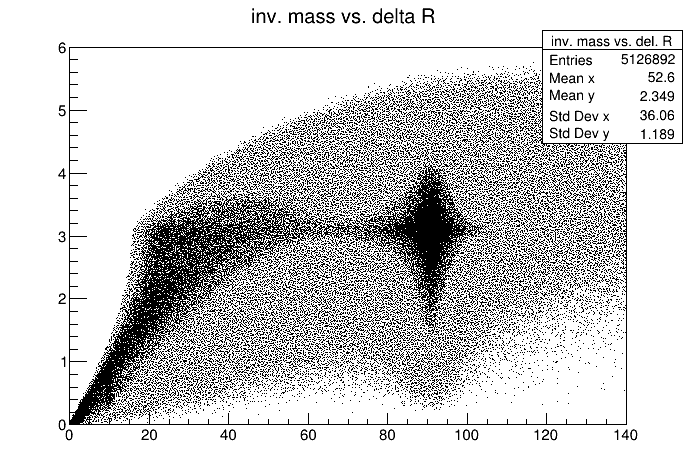

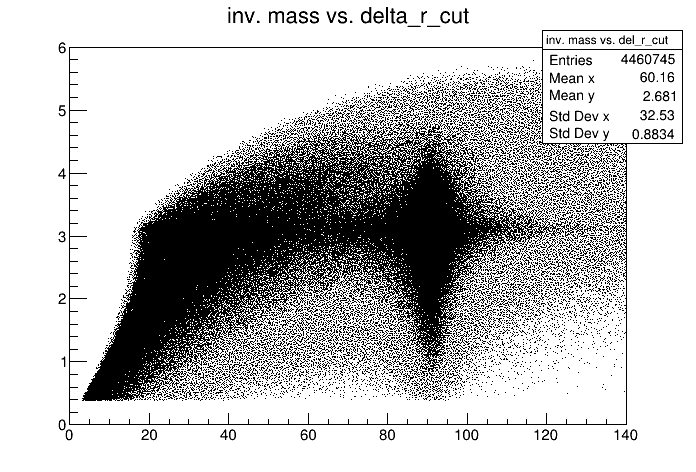

In [27]:
c4 = ROOT.TCanvas()
delr_inv.Draw()
c4.Draw()

c5 = ROOT.TCanvas()
delr_c_inv.Draw()
c5.Draw()

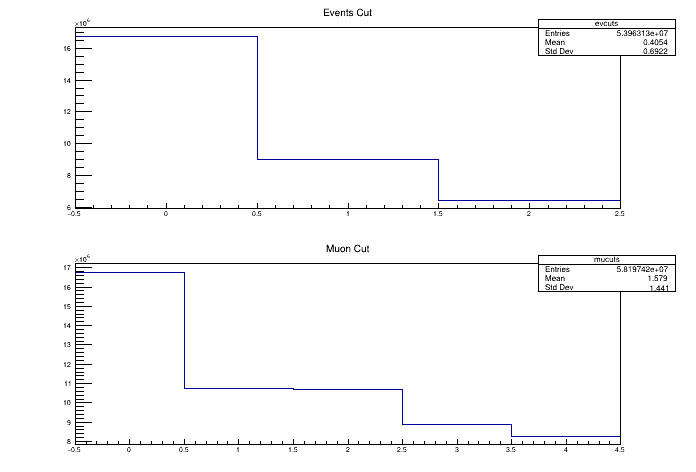

In [28]:
c6=ROOT.TCanvas()
c6.Divide(1,2)
c6.cd(1)
evcutflow.Draw()
c6.cd(2)
mucutflow.Draw()
c6.Draw()

In [29]:
a1=["global","all_idxs_cut","clean_idxs_cut"]
for i in range(3):
    print("Absolute efficiency after",a1[i],": ",(evcutflow[i+1]/evcutflow[1])*100,"%")
    print("Number of passed muons: ",int(evcutflow[i+1]))

Absolute efficiency after global :  100.0 %
Number of passed muons:  16777216
Absolute efficiency after all_idxs_cut :  53.80666255950928 %
Number of passed muons:  9027260
Absolute efficiency after clean_idxs_cut :  38.29982876777649 %
Number of passed muons:  6425645


In [30]:
for i in range(1,3):
    print("Relative efficiency after",a1[i],": ",(evcutflow[i+1]/evcutflow[i])*100,"%")

Relative efficiency after all_idxs_cut :  53.80666255950928 %
Relative efficiency after clean_idxs_cut :  71.18045785764451 %


In [31]:
a2=["global","pt_cut","eta_cut","iso_cut","tid_cut"]
for i in range(5):
    print("Absolute efficiency after",a2[i],": ",(mucutflow[i+1]/mucutflow[1])*100,"%")
    print("Number of passed muons: ",int(mucutflow[i+1]))

Absolute efficiency after global :  100.0 %
Number of passed muons:  16777216
Absolute efficiency after pt_cut :  64.04513120651245 %
Number of passed muons:  10744990
Absolute efficiency after eta_cut :  63.77540826797485 %
Number of passed muons:  10699738
Absolute efficiency after iso_cut :  52.95255184173584 %
Number of passed muons:  8883964
Absolute efficiency after tid_cut :  49.28047060966492 %
Number of passed muons:  8267891


In [32]:
for i in range(1,5):
    print("Relative efficiency after",a2[i],": ",(mucutflow[i+1]/mucutflow[i])*100,"%")

Relative efficiency after pt_cut :  64.04513120651245 %
Relative efficiency after eta_cut :  99.57885488958111 %
Relative efficiency after iso_cut :  83.02973399909418 %
Relative efficiency after tid_cut :  93.06533659974309 %
